In [ ]:
import re 
import matplotlib.pyplot as plt
import fine_tunned_bert
%matplotlib inline

from sklearn.model_selection import train_test_split
import pandas as pd

# model evaluation 
import scikitplot as skplt

In [2]:
df= pd.read_csv('./data/moral_appeal_dataset.csv')
df

,ad,moral_appeal
0,psd jobs spring launch webinar monday pmpm vir...,0
1,the aflcio has always fought alongside workers...,1
2,your national monuments are on the chopping block,0
3,join us for a focus group to share your though...,0
4,with president trump nominating a judge with a...,1
...,...,...
19729,what is senator heidi heitkamp hiding watch be...,0
19730,breaking the washington post just reported on ...,0
19731,protecting vermont is injured employees contac...,1
19732,according to the huffington post days after pa...,0


In [ ]:
bert_model_name='small_bert/bert_en_uncased_L-4_H-512_A-8'

In [ ]:
# vectorize testing and training data 
cleaned_train, cleaned_test, y_train, y_test= train_test_split(df['ad'], df['moral_appeal'] , test_size = 0.2, random_state = 0)
cleaned_train, cleaned_val, y_train, y_val = train_test_split(cleaned_train, y_train,  test_size=0.25, random_state= 42, shuffle = True)

In [28]:
train_data = tf.data.Dataset.from_tensor_slices(  (cleaned_train,y_train) ).batch(32)
val_data = tf.data.Dataset.from_tensor_slices( (cleaned_val,y_val) ).batch(32)
test_data = tf.data.Dataset.from_tensor_slices( (cleaned_test,y_test) ).batch(32)

In [ ]:
# create the fine_tunned_model
bert_model = fine_tunned_bert.create_fine_tunned_bert(train_data,bert_model_name=bert_model_name)

# training the model
history = bert_model.fit(x=train_data,epochs =5,validation_data = val_data,verbose=False)

124/124 [==============================] - 28s 227ms/step - loss: 0.0239 - accuracy: 0.9959 - precision: 0.9970 - recall: 0.9950 - auc: 0.9974
-----------------------------------------
Fold cofusion matrix
(1924, 6, 10, 2007)
-----------------------------------------


In [29]:
# evaluation 
scores = bert_model.evaluate(test_data)

predictions = bert_model.predict(cleaned_test)
results = (predictions>0.5)*1

124/124 [==============================] - 33s 269ms/step - loss: 0.0239 - accuracy: 0.9959 - precision: 0.9970 - recall: 0.9950 - auc: 0.9974


                 precision    recall  f1-score   support

no moral appeal       0.99      1.00      1.00      1930
   moral appeal       1.00      1.00      1.00      2017

       accuracy                           1.00      3947
      macro avg       1.00      1.00      1.00      3947
   weighted avg       1.00      1.00      1.00      3947

confusion matrix:
[[1924    6]
 [  10 2007]]



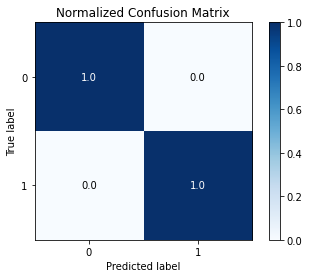

In [31]:
pred = [1 if prob > 0.5 else 0 for prob in predictions]

print(sklearn.metrics.classification_report(y_test, pred, target_names=[ 'no moral appeal', 'moral appeal']))
print("confusion matrix:")
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
plt.show()
print()

4/4 [==============================] - 1s 329ms/step - loss: 1.7422 - accuracy: 0.7680 - precision: 0.7647 - recall: 0.8784 - auc: 0.7691
Accuracy: 76.80%
                 precision    recall  f1-score   support

no moral appeal       0.78      0.61      0.68        51
   moral appeal       0.76      0.88      0.82        74

       accuracy                           0.77       125
      macro avg       0.77      0.74      0.75       125
   weighted avg       0.77      0.77      0.76       125

confusion matrix:
[[31 20]
 [ 9 65]]



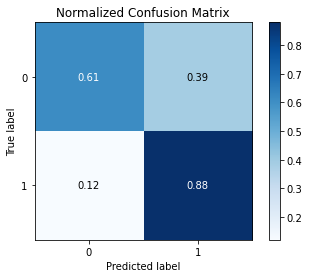

In [ ]:
import sklearn 
save = pd.read_csv('sample.csv')

test_data = tf.data.Dataset.from_tensor_slices( (save['ad'],save['moral_appeal']) ).batch(32)
# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))

pred_ =  bert_model.predict(save['ad'])
save['predicted'] = [1 if prob > 0.5 else 0 for prob in pred_]
print(sklearn.metrics.classification_report(save['moral_appeal'], save['predicted'], target_names=[ 'no moral appeal', 'moral appeal']))
print("confusion matrix:")
print(sklearn.metrics.confusion_matrix(save['moral_appeal'], save['predicted']))
print()

skplt.metrics.plot_confusion_matrix(save['moral_appeal'], save['predicted'], normalize=True)
plt.show()
print()
